# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Checking single City

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 28
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1673995035,
    "id": 2643743,
    "main": {
        "feels_like": -5.52,
        "humidity": 90,
        "pressure": 992,
        "temp": -1.61,
        "temp_max": 0.05,
        "temp_min": -3.76
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1673942277,
        "sunset": 1673972553,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 3.09
    }
}


In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | lazaro cardenas
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | horki
Processing Record 7 of Set 1 | beloha
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | beroroha
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | asau
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | zyryanka
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | sioux lookout
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | grand-santi
Processing Record 19 of Set 1 | dalvik
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | chuy
Processing Record 22 of S

Processing Record 38 of Set 4 | mae sai
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | pizarro
Processing Record 41 of Set 4 | shabqadar
Processing Record 42 of Set 4 | waingapu
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | ixtapa
Processing Record 45 of Set 4 | qena
Processing Record 46 of Set 4 | umba
Processing Record 47 of Set 4 | camacha
Processing Record 48 of Set 4 | vila franca do campo
Processing Record 49 of Set 4 | nurota
Processing Record 0 of Set 5 | richards bay
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | meyungs
City not found. Skipping...
Processing Record 4 of Set 5 | front royal
Processing Record 5 of Set 5 | paradwip
City not found. Skipping...
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | karasjok
Processing Record 9 of Set 5 | airai
Processing Record 10 of Set 5 | dingle
Pr

Processing Record 26 of Set 8 | namibe
Processing Record 27 of Set 8 | rubizhne
Processing Record 28 of Set 8 | valparaiso
Processing Record 29 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 30 of Set 8 | tiksi
Processing Record 31 of Set 8 | urucui
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | luganville
Processing Record 34 of Set 8 | road town
Processing Record 35 of Set 8 | gazli
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | bima
Processing Record 38 of Set 8 | tromso
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | bafra
Processing Record 41 of Set 8 | adelanto
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | sault sainte marie
Processing Record 44 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 45 of Set 8 | koppang
Processing Record 46 of Set 8 | tambopata
Processing Record 47 of Set 8 | kyshtym
Processing Record 48 of Set 8 | avera
Processing 

Processing Record 15 of Set 12 | nabire
Processing Record 16 of Set 12 | weihai
Processing Record 17 of Set 12 | iskateley
Processing Record 18 of Set 12 | wasilla
Processing Record 19 of Set 12 | middle island
Processing Record 20 of Set 12 | mahanje
Processing Record 21 of Set 12 | lethem
Processing Record 22 of Set 12 | komsomolskiy
Processing Record 23 of Set 12 | kukushtan
Processing Record 24 of Set 12 | pathein
Processing Record 25 of Set 12 | atbasar
Processing Record 26 of Set 12 | aguas vermelhas
Processing Record 27 of Set 12 | oussouye
Processing Record 28 of Set 12 | kilakarai
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | remanso
Processing Record 31 of Set 12 | yar-sale
Processing Record 32 of Set 12 | ojinaga
Processing Record 33 of Set 12 | venado
Processing Record 34 of Set 12 | kiama
Processing Record 35 of Set 12 | dillon
Processing Record 36 of Set 12 | hami
Processing Record 37 of Set 12 | chupei
City not found. Skipping...
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,102.5000,71.9667,-39.35,100,38,2.26,RU,1673995473
1,busselton,115.3333,-33.6500,14.66,58,40,7.22,AU,1673995474
2,lazaro cardenas,-102.2000,17.9583,25.98,61,88,3.70,MX,1673995300
3,alofi,-169.9187,-19.0595,28.94,79,40,2.57,NU,1673995474
4,lebu,-73.6500,-37.6167,15.91,76,4,5.46,CL,1673995475


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,102.5000,71.9667,-39.35,100,38,2.26,RU,1673995473
1,busselton,115.3333,-33.6500,14.66,58,40,7.22,AU,1673995474
2,lazaro cardenas,-102.2000,17.9583,25.98,61,88,3.70,MX,1673995300
3,alofi,-169.9187,-19.0595,28.94,79,40,2.57,NU,1673995474
4,lebu,-73.6500,-37.6167,15.91,76,4,5.46,CL,1673995475


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

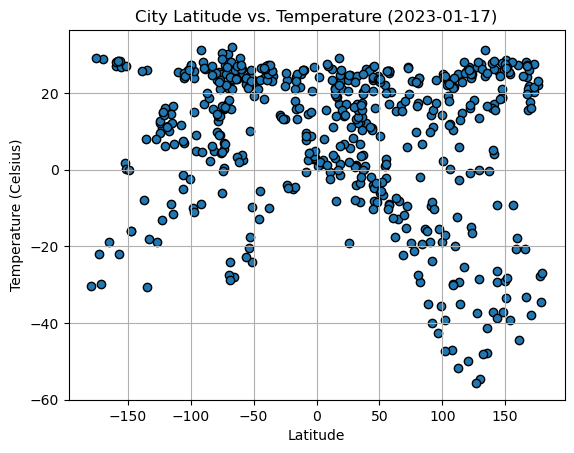

In [53]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

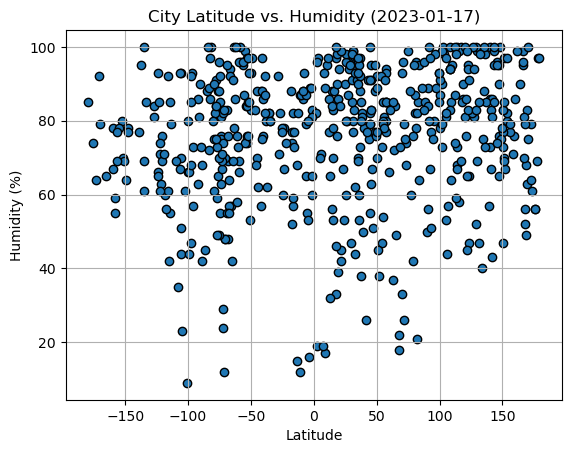

In [51]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

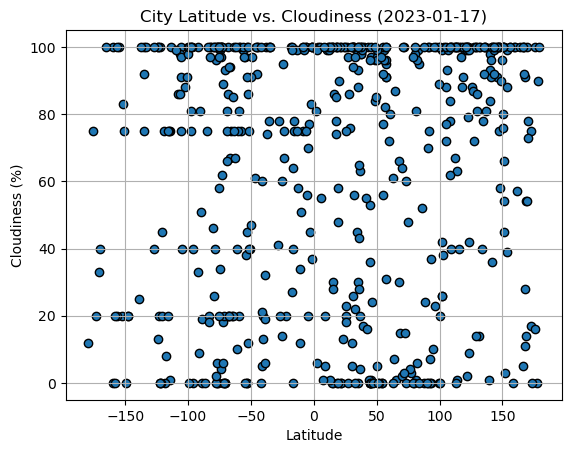

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

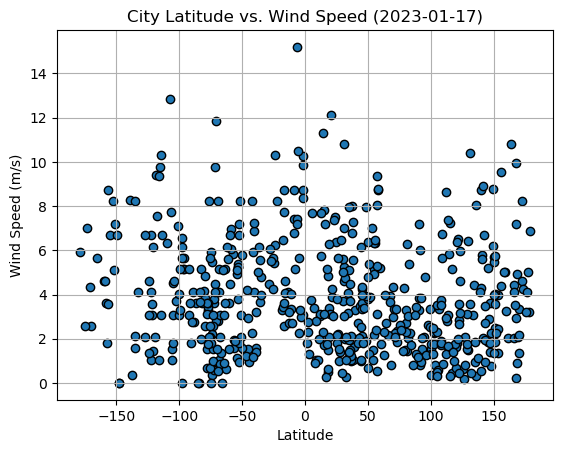

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(title)
    plt.xlabel("Latitude")
    plt.annotate(line_eq,(text_coordinates),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,khatanga,102.5000,71.9667,-39.35,100,38,2.26,RU,1673995473
1,busselton,115.3333,-33.6500,14.66,58,40,7.22,AU,1673995474
5,horki,30.9842,54.2861,1.06,99,100,7.03,BY,1673995475
6,beloha,45.0500,-25.1667,23.29,79,0,4.25,MG,1673995476
7,east london,27.9116,-33.0153,24.17,94,86,1.40,ZA,1673995476


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lazaro cardenas,-102.2000,17.9583,25.98,61,88,3.70,MX,1673995300
3,alofi,-169.9187,-19.0595,28.94,79,40,2.57,NU,1673995474
4,lebu,-73.6500,-37.6167,15.91,76,4,5.46,CL,1673995475
9,punta arenas,-70.9167,-53.1500,17.06,48,0,11.83,CL,1673995267
11,norman wells,-126.8329,65.2820,-18.98,84,40,2.06,CA,1673995478


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.017354643892464817
y = -0.05x +10.88


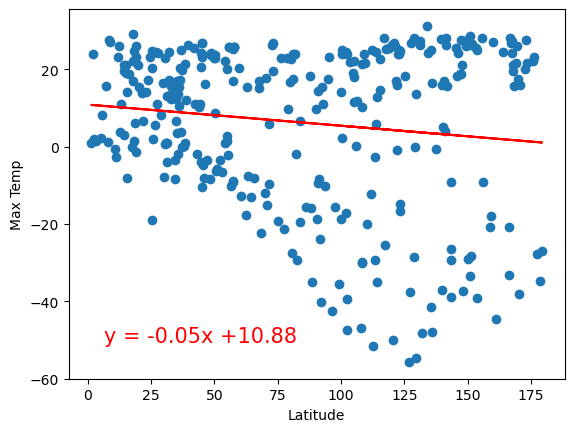

In [55]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp", (6,-10))

The r-value is: 0.03245412604335093
y = 0.06x +17.7


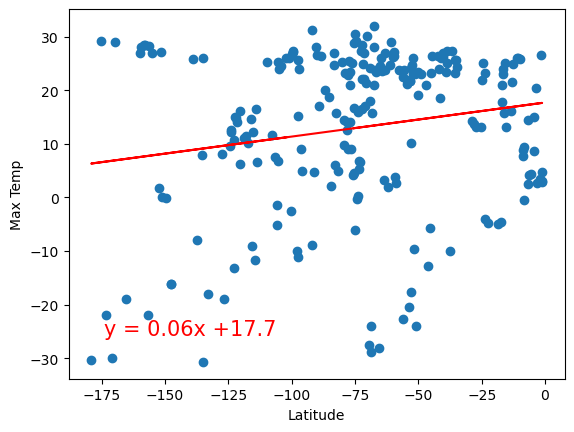

In [56]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp", (-175, -25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007012158152967439
y = 0.03x +75.42


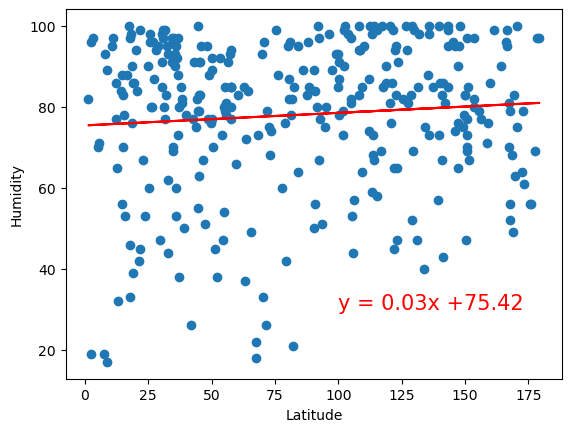

In [61]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity", (100, 30))

The r-value is: 0.0034672803110862237
y = 0.02x +75.3


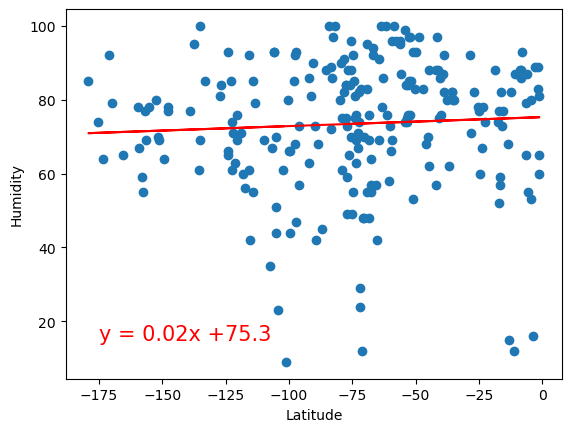

In [62]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity", (-175, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02111590150148389
y = 0.11x +55.33


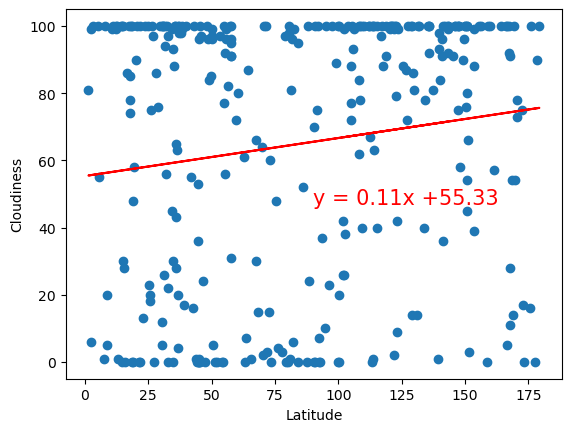

In [65]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness", (90, 47))

The r-value is: 0.01283361351834139
y = 0.1x +68.1


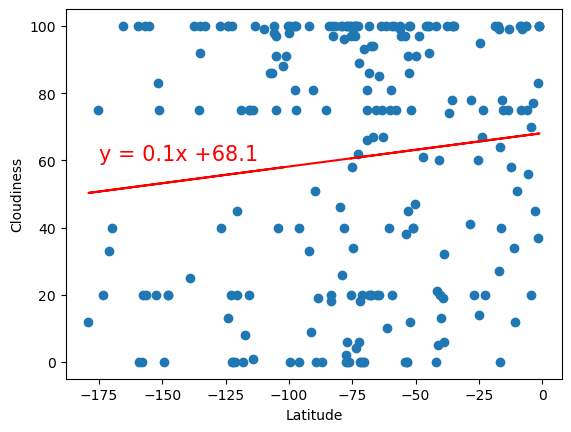

In [66]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness", (-175, 60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 7.307832229434606e-06
y = -0.0x +3.47


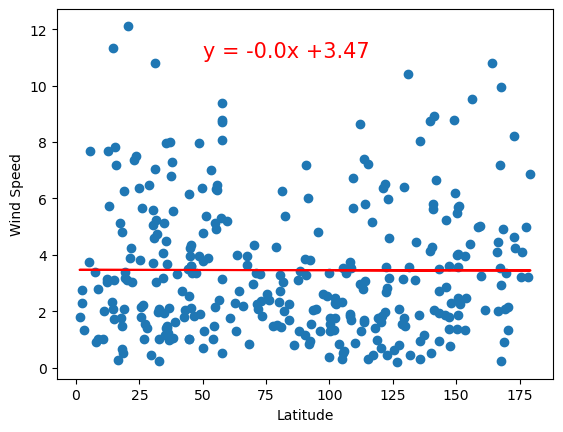

In [67]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed", (50, 11))

The r-value is: 0.01016287150860703
y = 0.01x +4.76


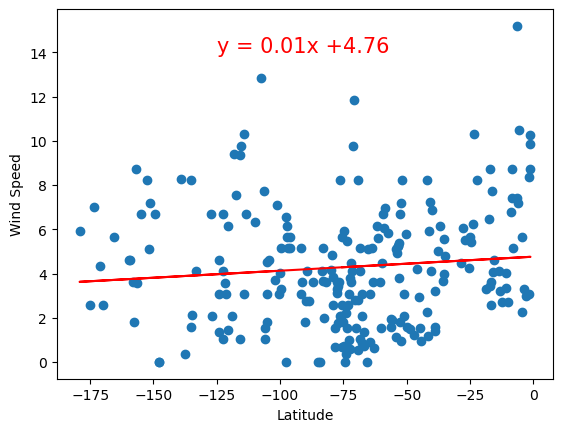

In [68]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", (-125, 14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE